## Outline: 
    
1. Package intro
2. How to read food webs from file?
3. How to work with food webs?
4. How to visualize food webs?

# foodwebviz 

foodwebviz is a Python package for visualisation of foodwebs / trophic networks.

In [1]:
import foodwebviz as fw

# How to read food webs?

`fw.read_from_SCOR(scor_path)` allows to read food web from a file in the SCOR format

`scor_path` can be an absolute or a relative path

In [2]:
foodweb = fw.read_from_SCOR('data/Richards_Bay_C_Summer.scor')

Reading file: data/Richards_Bay_C_Summer.scor


# How to work with food webs? 

Let's check some basic information about a food web:

In [24]:
print(f'Title: {foodweb.title}\n')
print(f'Number of nodes: {foodweb.n}')
print(f'Number of living nodes: {foodweb.n_living}')

Title: Table 5. Flow data for the Richards Bay Summer carbon network. Rows = prey, Columns = predator. B = biomass, I = import. R = respiration, E = export.

Number of nodes: 33
Number of living nodes: 29


Let's see the first rows of the table with information on nodes (vertices) - pandas.DataFrame:

In [25]:
foodweb.node_df.head(5)

,IsAlive,Biomass,Import,Export,Respiration,TrophicLevel
Names,,,,,,
Diatoms,True,0.5011,0.0,0.0,74.649,2.000000
Flagellates,True,0.3424,0.0,0.0,53.438,2.000000
Bacteria,True,0.5200,0.0,0.0,27.560,2.029999
HM plankton,True,0.0818,0.0,0.0,5.892,2.029986
Small copepods,True,0.0375,0.0,0.0,3.450,2.868366


The information about biomass flows is encoded in the flow matrix (showing first five rows):

In [26]:
foodweb.flow_matrix.head()

Names,Diatoms,Flagellates,Bacteria,HM plankton,Small copepods,Medium copepods,Large copepods,Other lg zooplankton,Sm macrobenthos,Lg suspension feeder,...,Sm pelagic fish,Lg pelagic fish,Skates and rays,Sm benthic shark,Large sharks,Cetaceans,Susp POC,Sed POC,DOC,DIC
Names,,,,,,,,,,,,,,,,,,,,,
Diatoms,0.0,0.0,1.677,0.264,2.8900,1.8000,0.8940,0.0307,0.00,0.0,...,251.0000,0.0,0.0,0.0,0.0,0.0,41.10,0.0,0.0,0.0
Flagellates,0.0,0.0,1.677,0.264,2.0600,1.2300,0.6380,0.0219,0.00,0.0,...,188.0000,0.0,0.0,0.0,0.0,0.0,22.10,0.0,0.0,0.0
Bacteria,0.0,0.0,0.000,0.000,0.1860,0.7910,0.4100,0.0205,0.00,58.8,...,0.0000,0.0,0.0,0.0,0.0,0.0,24.00,0.0,0.0,0.0
HM plankton,0.0,0.0,0.000,0.000,0.0012,0.0048,0.0025,0.0005,7.76,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,3.93,0.0,0.0,0.0
Small copepods,0.0,0.0,0.000,0.000,0.1240,0.8780,0.2070,0.0579,0.00,0.0,...,0.0542,0.0,0.0,0.0,0.0,0.0,1.30,0.0,0.0,0.0


# How to visualize food webs?

## A heatmap of food web flows

The heatmap representation of a food web has the network's nodes on its axes. The color intensity at the intersection of rows and columns marking these nodes represents the biomass flow from the node in row to the node in the column. Additionally, trophic levels related to the nodes can be showed as background colour.

The heatmap can also show biomass flows normalised, e.g. to the total inflows (to show diet proportions) of the target node, or to the biomass of the source node (as in donor-control model), or to the sum of all flows in the network (total system throughflow, TST). The normalisation to TST is a natural way of comparing food webs with each other, as each food web is likely to use different units. 

The documentation of draw_hetmap() method that implements it is presented below:

In [27]:
help(fw.draw_heatmap)

Help on function draw_heatmap in module foodwebviz.visualization:

draw_heatmap(food_web, boundary=False, normalization='log', show_trophic_layer=True, switch_axes=False, width=1200, height=800)
    Visualize foodweb as a heatmap. On the interesction
    of X axis ("from" node) and Y axis ("to" node) flow weight
    is indicated.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    boundary : bool, optional (default=False)
        If True, boundary flows will be added to the graph.
        Boundary flows are: Import, Export, and Repiration.
    normalization : string, optional (default=log)
        Defines method of graph edges normalization.
        Available options are: 'diet', 'log', 'donor_control',
        'predator_control', 'mixed_control', 'linear' and 'tst'.
    show_trophic_layer : bool, optional (default=False)
        If True, include additional heatmap layer presenting trophic levels relevant to X axis.
    switch_axes : bool, opt

Example usage:

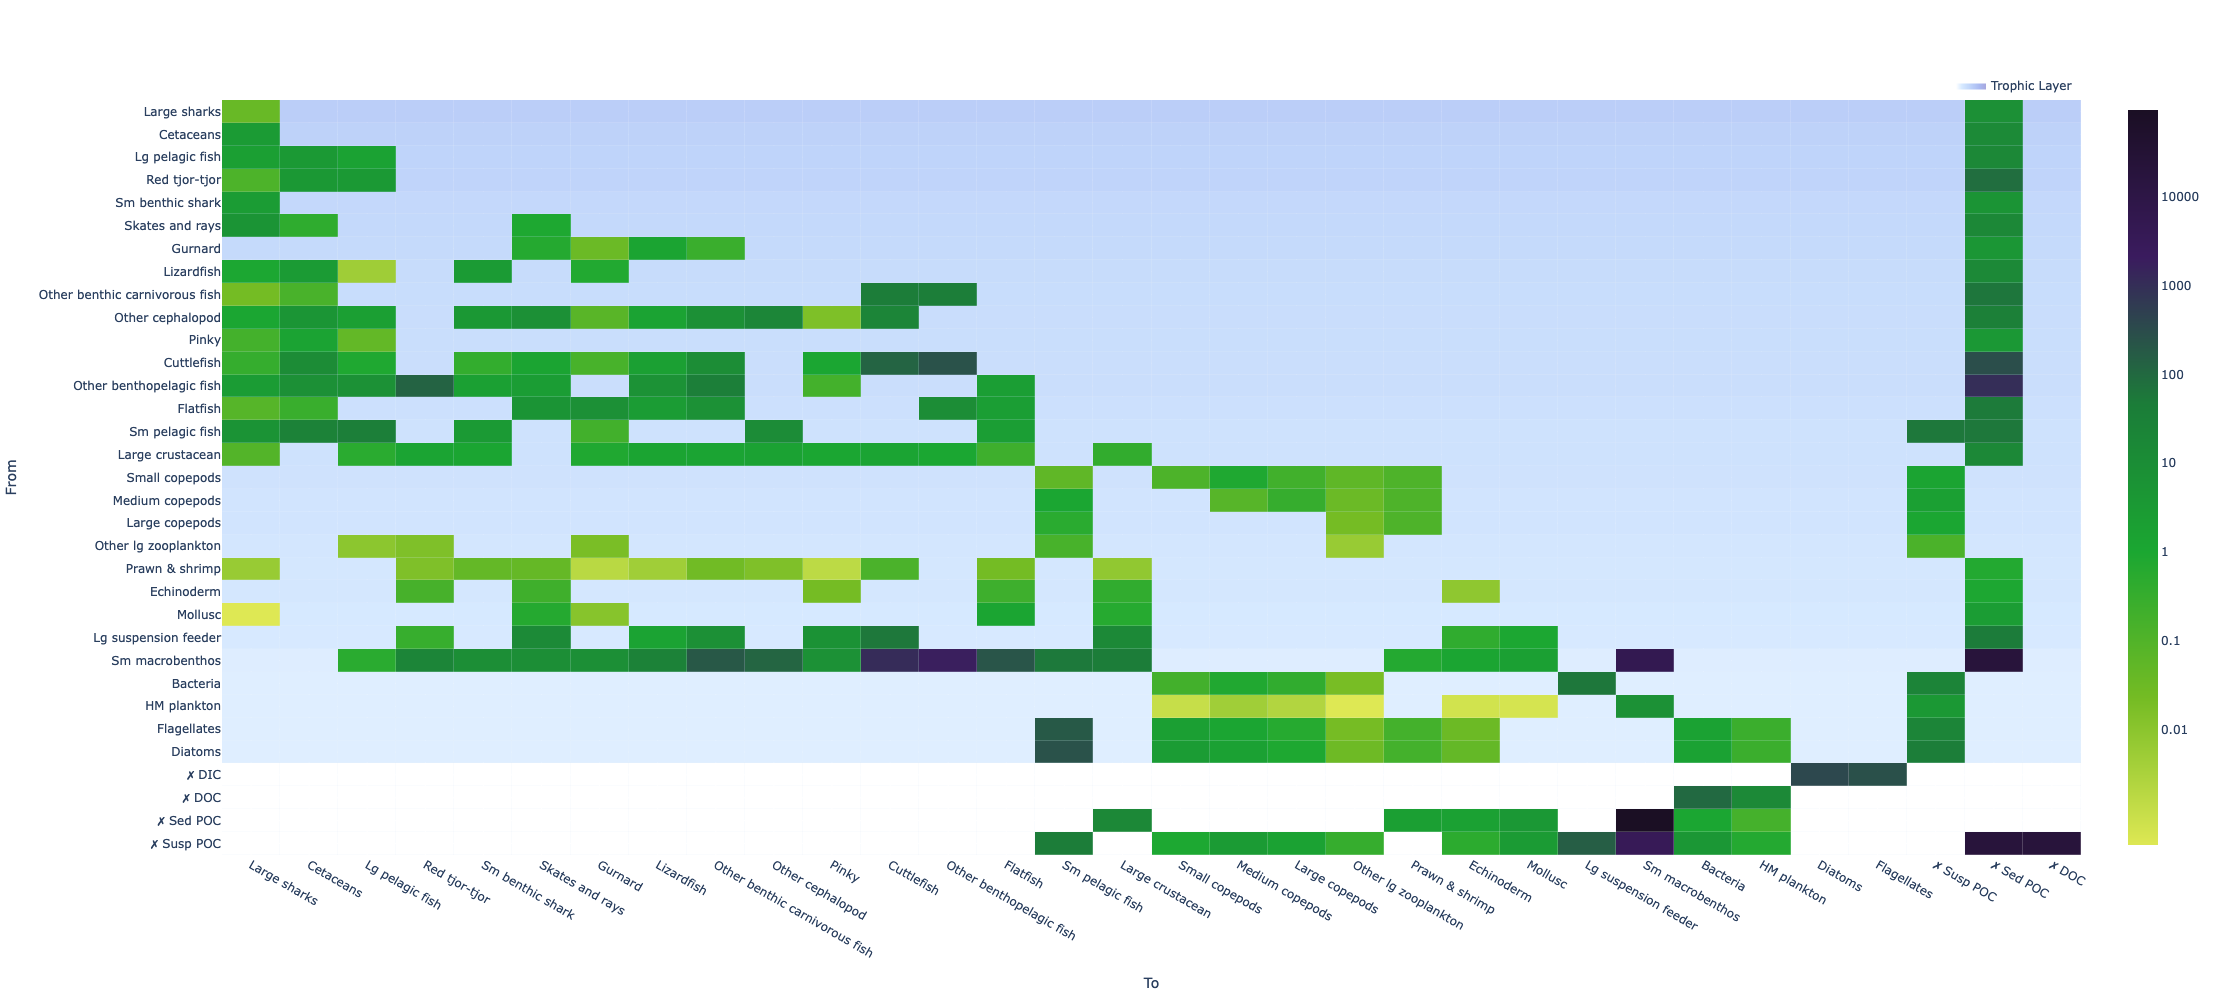

In [28]:
fw.draw_heatmap(foodweb, normalization='log', show_trophic_layer=True, boundary=False, height=1000)

The same heatmap, but with 'diet' normalization:

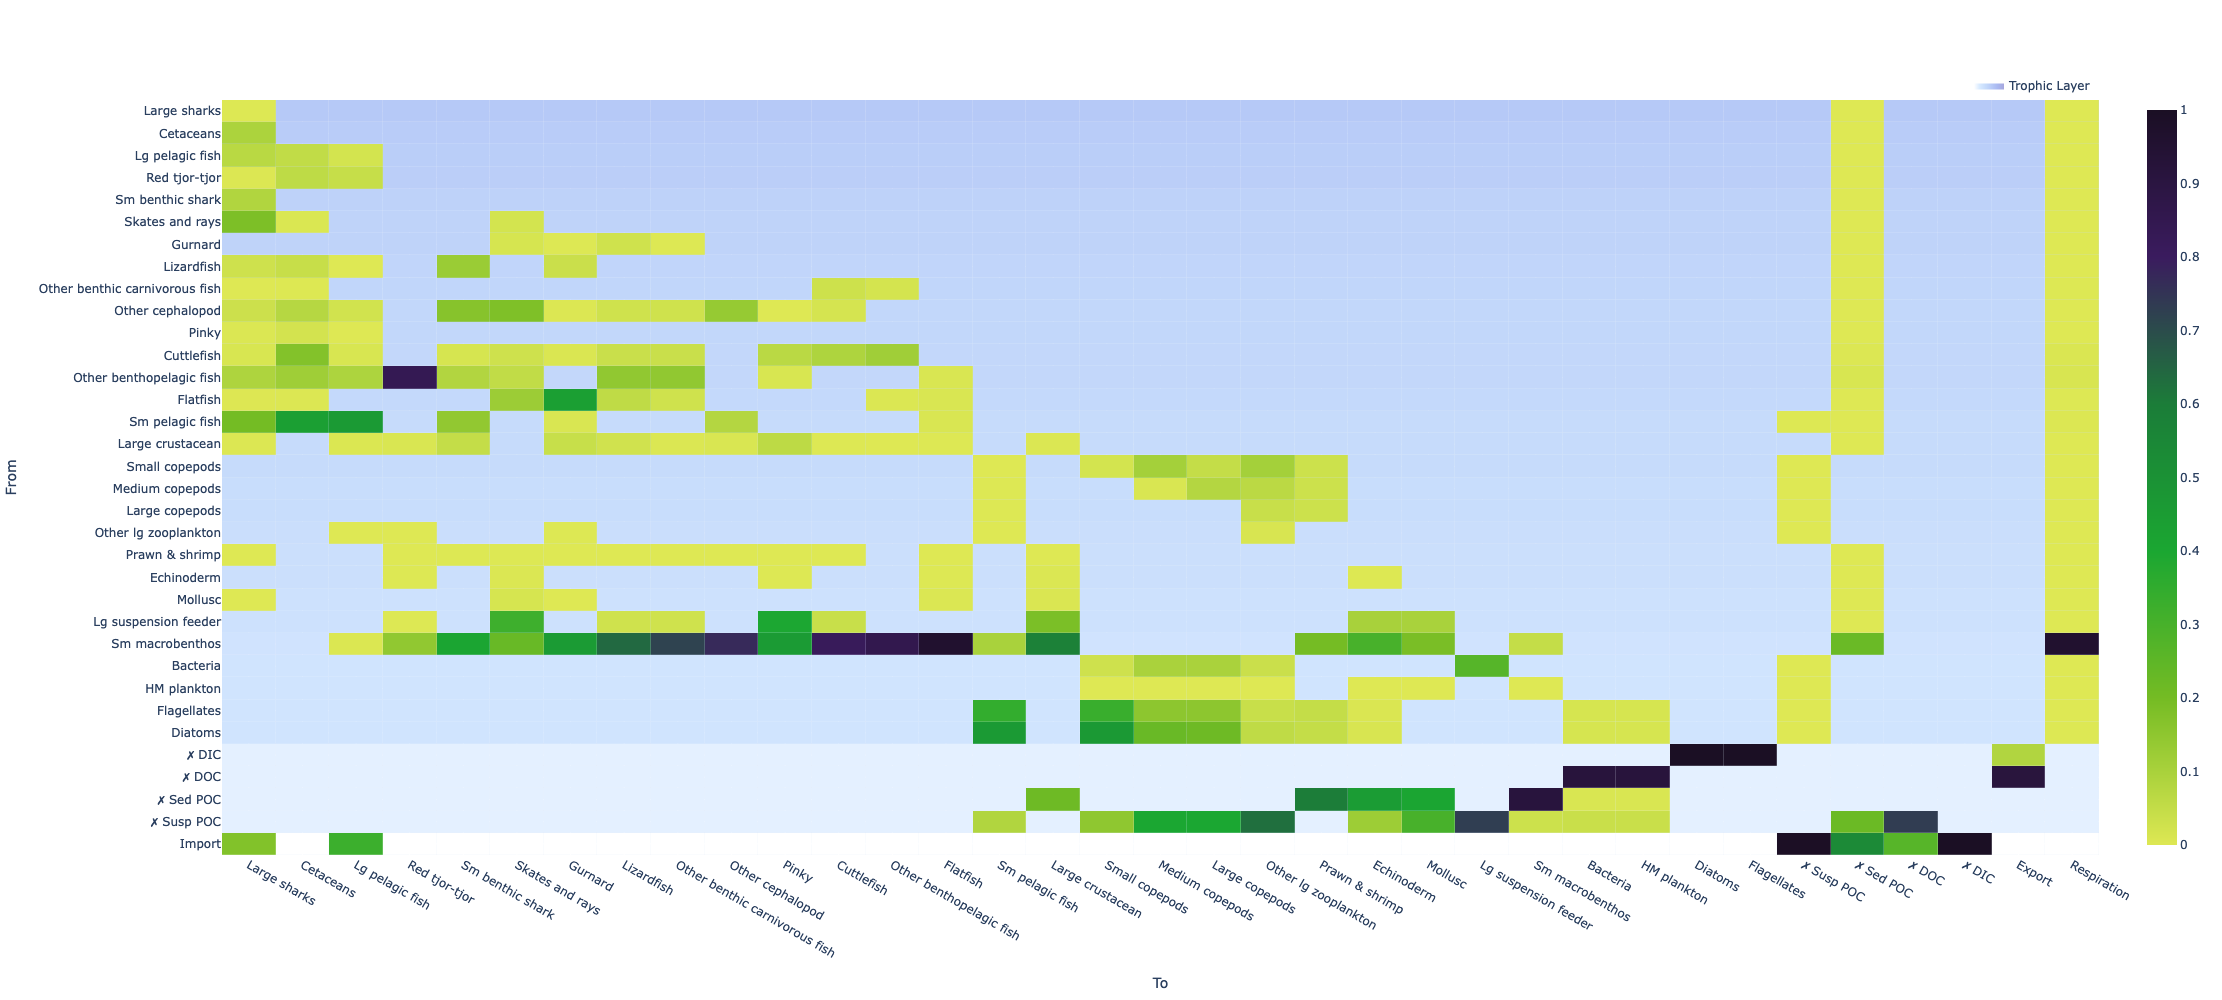

In [29]:
fw.draw_heatmap(foodweb, normalization='diet', show_trophic_layer=True, boundary=True, height=1000)

## A graph

A natural way of representing graphs (networks) is just to draw the vertices and links between them.
To improve readability we present them in an interactive form. There are possibilities to zoom, drag and drop and further adjust the plot via parameters.

Food webs have a natural hierarchy, described by trophic levels. Therefore, the vertical positions of nodes represent their trophic levels. 

When drawing graphs, readability demands adjusting node positions to minimize clutter and overlap of nodes and links. A helpful algorithm uses an analogy with a physical system: nodes repel each other and links act like springs. This algorithm is used to optimize horizontal positions of nodes.

The method's documentation with available parameters is presented below:

In [4]:
help(fw.draw_network_for_nodes)

Help on function draw_network_for_nodes in module foodwebviz.visualization:

draw_network_for_nodes(food_web, nodes=None, file_name='interactive_food_web_graph.html', notebook=True, height='800px', width='100%', no_flows_to_detritus=True, **kwargs)
    Visualize subgraph of foodweb as a network.
    Parameters notebook, height, and width refer to initialization parameters of pyvis.network.Network.
    Additional parameters may be passed to hierachical repulsion layout as defined in
    pyvis.network.Network.hrepulsion. Examples are: node_distance, central_gravity,
    spring_length, or spring_strength.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    nodes : list of strings
        Nodes to include in subgraph to visualize.
    file_name : string, optional (default="food_web.html")
        File to save network (in html format)
    notebook - bool, optional (default=True)
        True if using jupyter notebook.
    height : string, optional 

Whole food webs might have too many nodes and connections to be clearly readable in this format. Therefore, we provide a way to draw only a part of the network. If 'nodes' parameter is specified, only the given nodes and their neighbours (nodes they directly interact with) are drawn.

In [31]:
fw.draw_network_for_nodes(foodweb, ['Echinoderm', 'Diatoms', 'Flagellates'])

#### Note: By defualt, this method creates a file named 'food_web.html' which can be directly opened as a separate web browser tab. It allows to see and manipulate the graph in a larger window. Also, it is easier to take a snapshot of the graph to save it.

## Trophic flows distributions as bar plots


One can aggregate nodes into integer trophic levels to summarize certain aspects of a food web. A stacked bar plot shows percentages of flows from one trophic level to another. Color bars and numbers indicate the flow distribution around each trophic level, marked on the Y axis. Optionally, they can be normalized to 100\%.

The method's documentation with available parameters is presented below:

In [32]:
help(fw.draw_trophic_flows_distribution)

Help on function draw_trophic_flows_distribution in module foodwebviz.visualization:

draw_trophic_flows_distribution(food_web, normalize=True, width=1000, height=800)
    Visualize flows between trophic levels as a stacked bar chart.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    normalize : bool, optional (default=True)
        If True, bars will represent percentages summing up to 100
    width : int, optional (default=600)
        Width of the plot.
    height : int, optional (default=800)
        Height of the plot.
    
    Returns
    -------
    heatmap : plotly.graph_objects.Figure



Example:

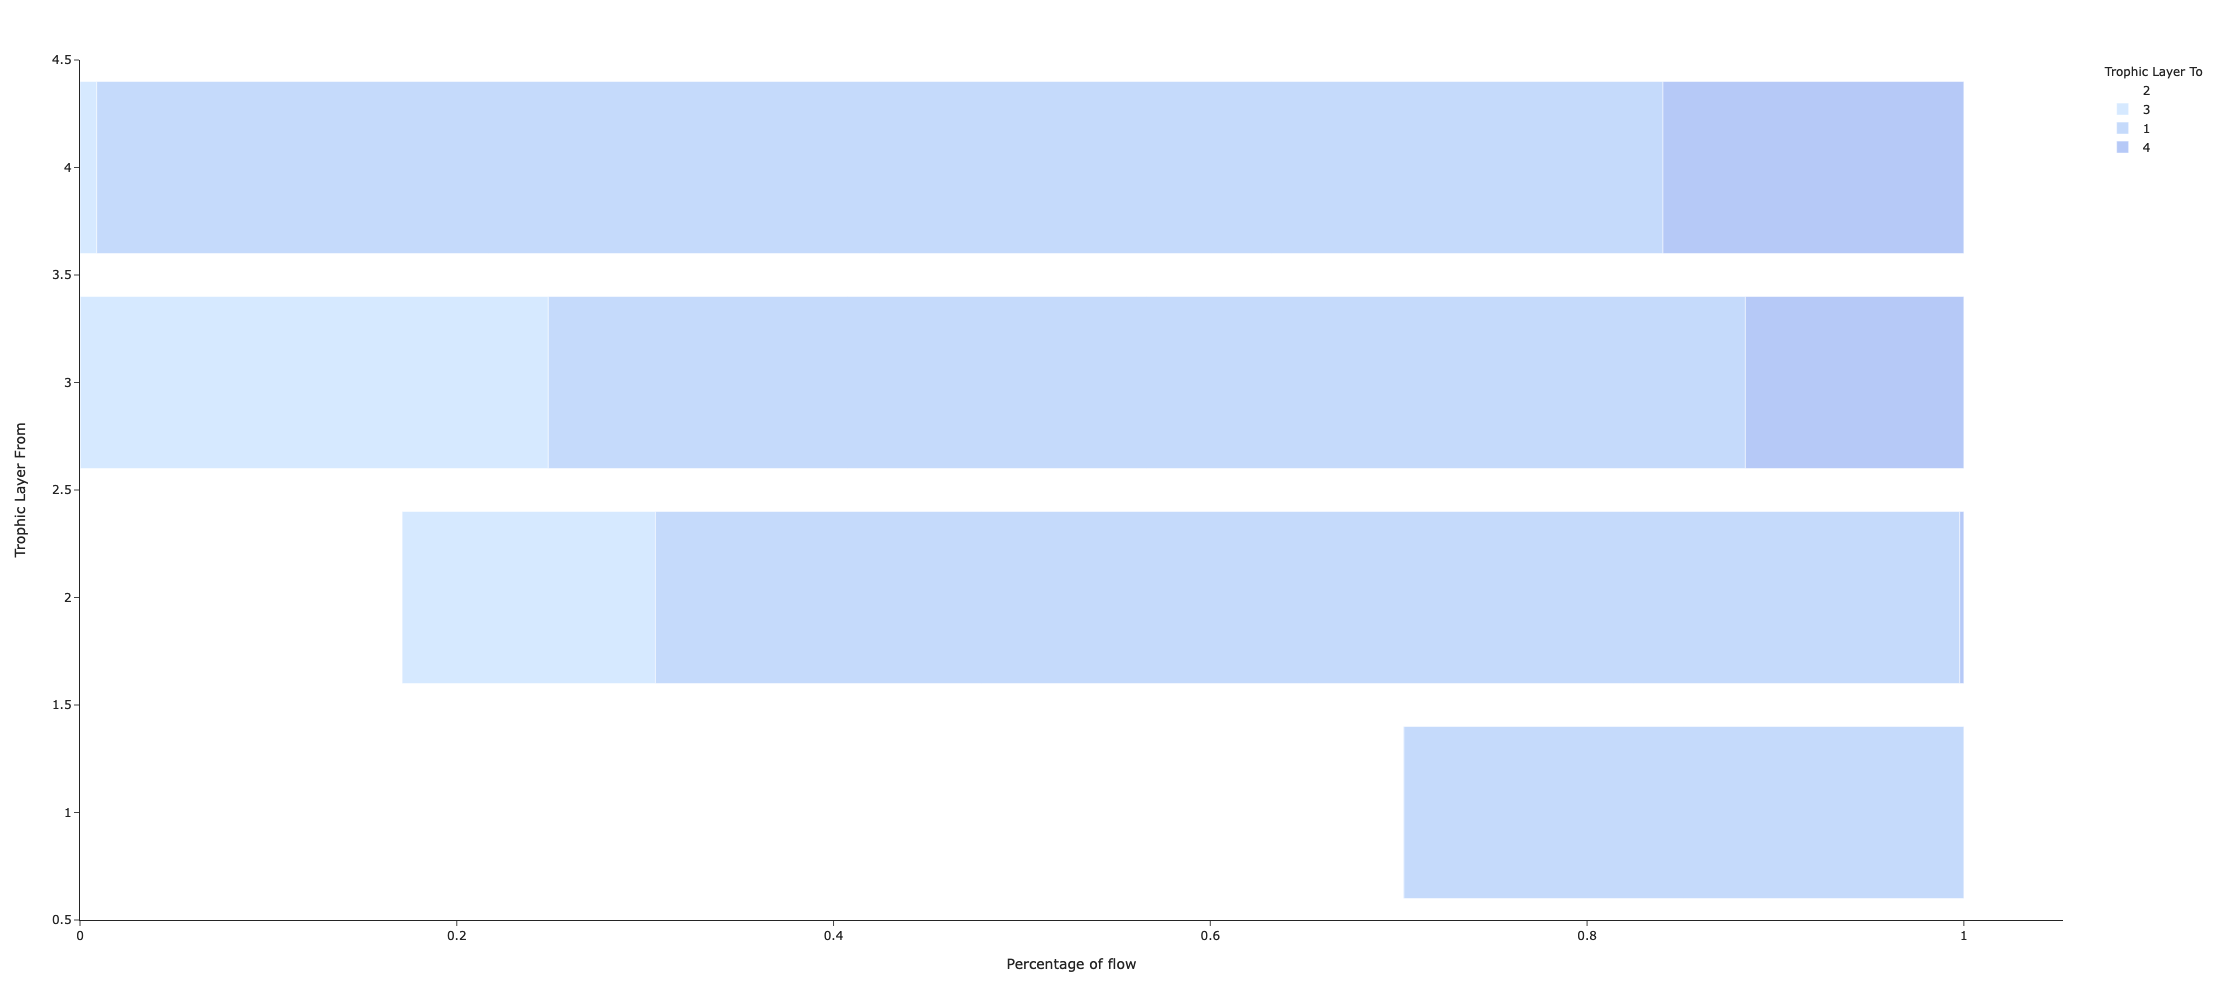

In [33]:
fw.draw_trophic_flows_distribution(foodweb)

## A heatmap of trophic flows

This heatmap visualization presents the sum of all flows between trophic levels. The color intensity encodes the flow sum for the trophic levels on the axes. The color scale can be transformed to a logarithmic scale.

Method's documentation with available parameters is presented below:

In [34]:
help(fw.draw_trophic_flows_heatmap)

Help on function draw_trophic_flows_heatmap in module foodwebviz.visualization:

draw_trophic_flows_heatmap(food_web, switch_axes=False, log_scale=False, width=1200, height=800)
    Visualize flows between foodweb's trophic levels as a heatmap.
    The color at (x,y) represents the sum of flows from trophic level x to
    trophic level y.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    switch_axes : bool, optional (default=False)
        If True, X axis will represent "to" trophic levels and Y - "from".
    log_scale : bool, optional (default=False)
        If True, log color scale will be used.
    width : int, optional (default=1200)
        Width of the plot.
    height : int, optional (default=800)
        Height of the plot.
    
    Returns
    -------
    heatmap : plotly.graph_objects.Figure



Example:

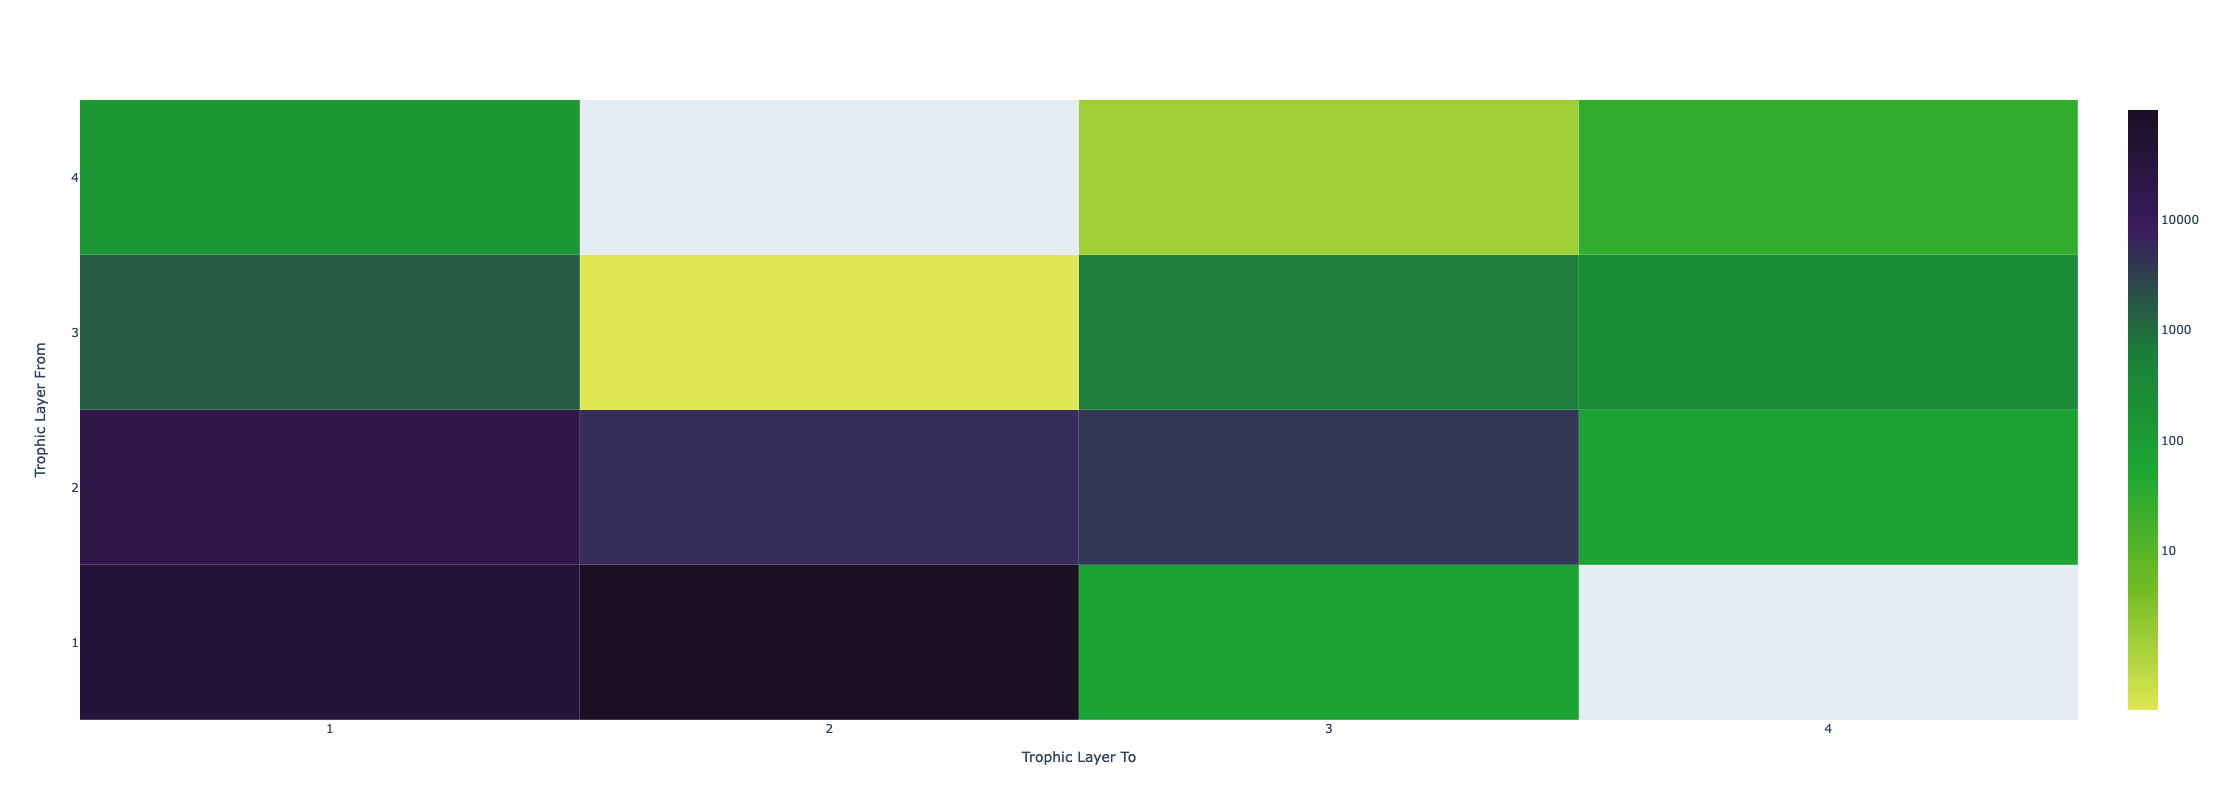

In [35]:
fw.draw_trophic_flows_heatmap(foodweb, log_scale=True)

## Animation

An animated graph presents matter actually moving in a food web. To present the most relevant information, the respirations, exports and flows to detrital nodes are skipped - they are present for every living node.
Vertical node positions represent their trophic levels. The density of moving particles maps the magnitude of the flow. The node sizes map their biomass stock. The mapping function can be given as the 'map_fun' argument and is set to the square root by default. 
Nodes are coloured according to their trophic level. Particles inherit the colour of their source node.

In [36]:
help(fw.animate_foodweb)

Help on function animate_foodweb in module foodwebviz.create_animated_food_web:

animate_foodweb(foodweb, gif_file_out, fps=10, anim_len=1, trails=1, min_node_radius=0.5, min_part_num=1, max_part_num=20, map_fun=<ufunc 'sqrt'>, include_imports=True, include_exports=False, cmap=<matplotlib.colors.ListedColormap object at 0x119895ee0>, max_luminance=0.85, particle_size=8)
    foodweb_animation creates a GIF animation saved as gif_file_out based on the food web
    provided as a SCOR file scor_file_in. The canvas size in units relevant
    to further parameters is [0,100]x[0,100].
    
    Parameters
    ----------
    trails : int
        the number of shades after each particle; shades are dots of diminishing opacity;
        it significantly impacts computation length
    min_node_radius : float
        the radius of the smallest node on canvas [0,100]x[0,100]
    min_part_num : int
        the number of particles representing the smallest flow
    max_part_num : int
        the number

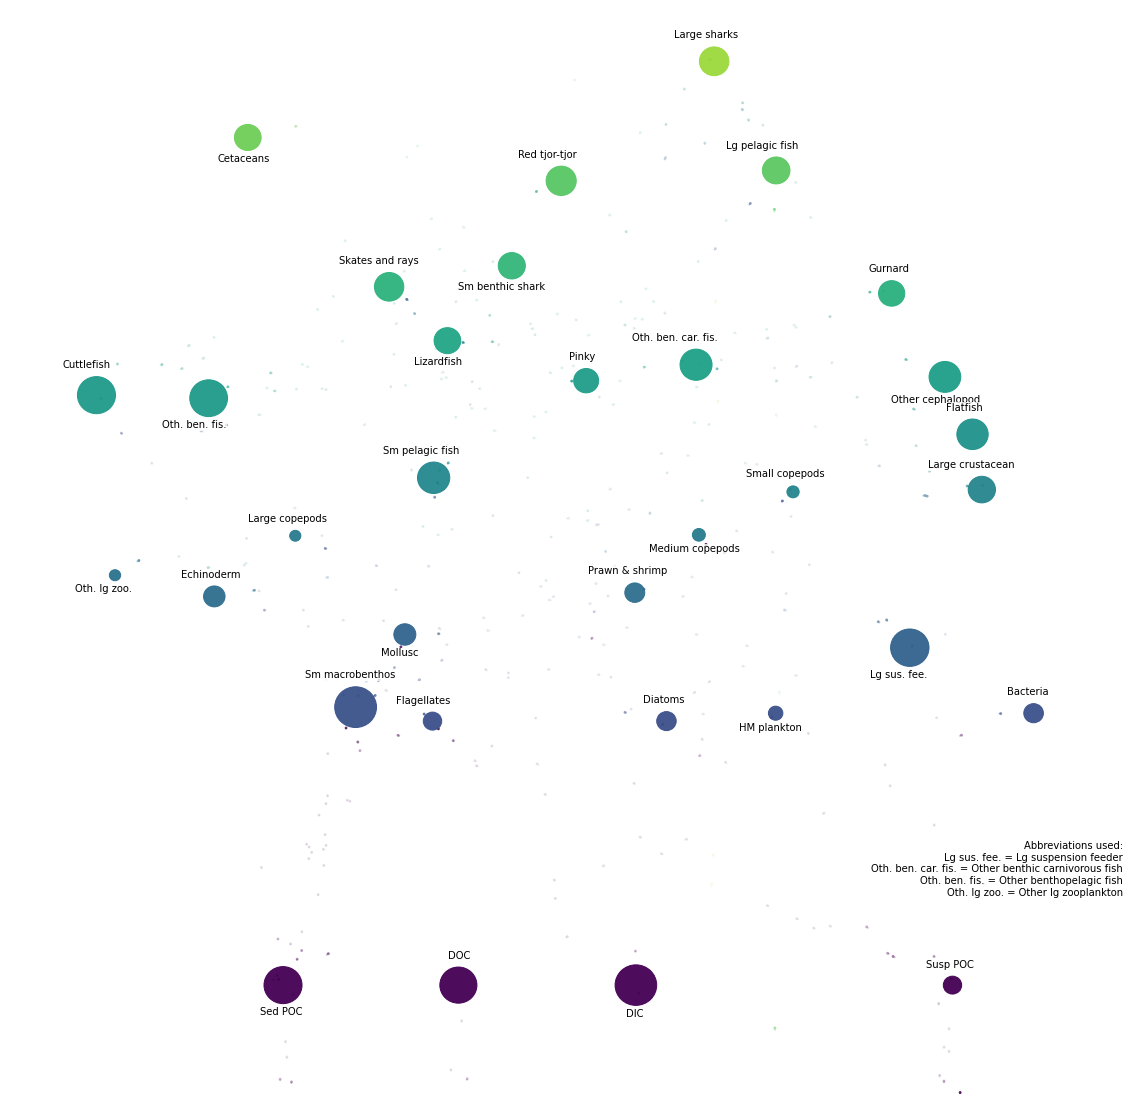

In [37]:
fw.animate_foodweb(foodweb,'Example_animation.gif')

To view the created animation, type `![](Example_animation.gif "Animated food web")`
into a cell, change the cell type to "Markdown" and evaluate it. Change the "Example_animation.gif" to the file name that you chose when making the animation. Below are two precomputed sample animations - kept short to save space: food webs of Prince William Sound in Alaska and Richards Bay in South Africa.

![](sample_output/Animation_Prince_William_Sound_Alaska.gif "Animated food web")

![](sample_output/Animation_Richards_Bay_South_Africa.gif "Animated food web")